In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-19 10:45:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1         4%[                    ]  64,00K  --.-KB/s    eta 8m 28s ^C


In [2]:
df = pd.read_csv("./housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

In [4]:
df["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

/home/misa/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

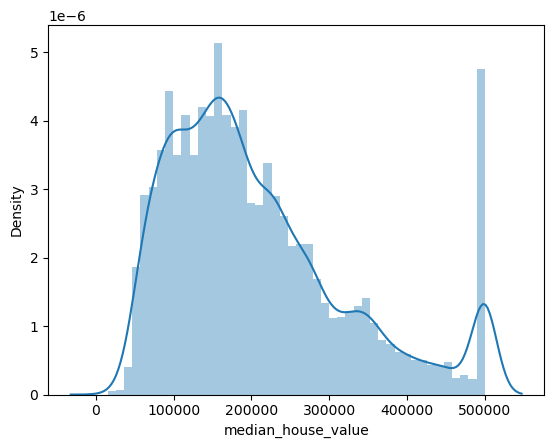

In [5]:
sns.distplot(df["median_house_value"])

In [6]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
data = df[df["ocean_proximity"] == "INLAND"]

In [8]:
data = data.drop(columns=["ocean_proximity"])

In [9]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1

In [10]:
data.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        55
population             0
households             0
median_income          0
median_house_value     0
dtype: int64

## Question 2

In [11]:
data["population"].describe()

count     6551.000000
mean      1391.046252
std       1168.670126
min          5.000000
25%        722.000000
50%       1124.000000
75%       1687.000000
max      16305.000000
Name: population, dtype: float64

In [12]:
data["population"].median()

1124.0

### The median for variable 'population' is 1124.

## Prepare and split the dataset

In [13]:
# Split the data in train/val/test sets
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
# Shuffle the initial dataset, use seed 42
index = np.arange(n)
np.random.seed(42)
np.random.shuffle(index)

In [15]:
df_train = data.iloc[index[:n_train]]
df_val = data.iloc[index[n_train:n_train+n_val]]
df_test = data.iloc[index[n_train+n_val:]]

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
# The log transformation to the median house value
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [18]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

## Question 3

In [19]:
# Function for rmse values
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [20]:
# Function for train_linear_regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#### Option to deal the missing value , and fill it with 0

In [21]:
# Transform the data sets to numpy
X_null_train = df_train.fillna(0)
X_null_val = df_val.fillna(0)

In [22]:
X_null_train.to_numpy()

array([[-1.1555e+02,  3.2800e+01,  2.3000e+01, ...,  5.8000e+02,
         1.6000e+02,  2.1136e+00],
       [-1.1985e+02,  3.6780e+01,  8.0000e+00, ...,  1.4540e+03,
         5.4500e+02,  2.7857e+00],
       [-1.2129e+02,  3.8650e+01,  2.7000e+01, ...,  1.3400e+03,
         4.5200e+02,  3.8816e+00],
       ...,
       [-1.1772e+02,  3.4100e+01,  4.6000e+01, ...,  1.0340e+03,
         4.5500e+02,  5.5000e+00],
       [-1.1902e+02,  3.6070e+01,  2.9000e+01, ...,  1.6590e+03,
         5.7100e+02,  1.5911e+00],
       [-1.1977e+02,  3.6300e+01,  2.4000e+01, ...,  1.0520e+03,
         4.3900e+02,  2.1038e+00]])

In [23]:
print(X_null_val.shape)
print(X_null_train.shape)

(1310, 8)
(3931, 8)


In [24]:
w0_null , w_null = train_linear_regression(X_null_train, y_train)

In [25]:
# Calculate the y_pred_val
y_null_pred_val = w0_null + X_null_val.dot(w_null)

In [26]:
# rmse score
rmse(y_val, y_null_pred_val).round(2)

0.33

#### Option to deal the missing value , and fill it with mean

In [27]:
# Transform the data sets to numpy
X_mean_train = df_train.fillna(df_train["total_bedrooms"].mean())
X_mean_val = df_val.fillna(df_val["total_bedrooms"].mean())

In [28]:
X_mean_train.to_numpy()
X_mean_val.to_numpy()

array([[-1.1957e+02,  3.7020e+01,  1.6000e+01, ...,  2.1400e+03,
         7.2200e+02,  3.3320e+00],
       [-1.1937e+02,  3.6190e+01,  2.4000e+01, ...,  8.8900e+02,
         2.7600e+02,  2.4922e+00],
       [-1.1804e+02,  3.4090e+01,  3.4000e+01, ...,  1.4610e+03,
         3.9700e+02,  3.8304e+00],
       ...,
       [-1.1972e+02,  3.6820e+01,  1.6000e+01, ...,  1.0540e+03,
         6.2300e+02,  1.9483e+00],
       [-1.2146e+02,  3.8550e+01,  5.2000e+01, ...,  1.7890e+03,
         5.5800e+02,  1.7616e+00],
       [-1.2140e+02,  3.8630e+01,  3.0000e+01, ...,  1.5770e+03,
         8.0600e+02,  2.5170e+00]])

In [29]:
w_mean_null , w_mean = train_linear_regression(X_mean_train, y_train)

In [30]:
# Calculate the y_pred_val
y_mean_pred_val = w_mean_null + X_mean_val.dot(w_mean)

In [31]:
# rmse score
rmse(y_val, y_mean_pred_val).round(2)

0.33

#### Both are equally good

## Question 4

#### Training a regularized linear regression

In [32]:
# Function for a train_linean_regression with regularization
def train_linear_regression_regularized(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0] , w[1:]

In [42]:
# Inspecting the result 
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10] :
    w0, w = train_linear_regression_regularized(X_null_train, y_train, r=r)
    y_pred_reg = w0 + X_null_val.dot(w)
    rmse_regularized = rmse(y_val , y_pred_reg).round(4)
    print("r :", r, " = " , w0 , " - " , rmse_regularized )

r : 0  =  1.7119439740098468  -  0.3288
r : 1e-06  =  1.7119345510753572  -  0.3288
r : 0.0001  =  1.7110021557299913  -  0.3288
r : 0.001  =  1.702572253406526  -  0.3288
r : 0.01  =  1.622632801824091  -  0.3288
r : 0.1  =  1.1044434552289175  -  0.3287
r : 1  =  0.26480213809102904  -  0.3287
r : 5  =  0.062110788260701044  -  0.3288
r : 10  =  0.03271058825826362  -  0.3287


## Question 5

#### The seed who influences our score

In [34]:
#shuffle dataset
rmse_score = []

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    index = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(index)
    
    df_shuffled = data.iloc[index]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # The log transformation to the median house value
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]
    
    X_null_train = df_train.fillna(0)
    X_null_val = df_val.fillna(0)
    
    w0_null , w_null = train_linear_regression(X_null_train, y_train)
    y_null_pred_val = w0_null + X_null_val.dot(w_null)
    rmse_val = rmse(y_val, y_null_pred_val).round(2)
    
    rmse_score.append(rmse_val)
    
    print(i, w0_null, rmse_val)

0 1.3488523378426613 0.33
1 0.6424739308935621 0.34
2 2.063316469357222 0.34
3 0.2695227595958887 0.31
4 0.6971719385617163 0.34
5 1.0885694094835654 0.33
6 1.2337592697660504 0.33
7 0.6587938746487949 0.32
8 1.4080744212592755 0.32
9 1.7119439740098468 0.33


In [35]:
rmse_score

[0.33, 0.34, 0.34, 0.31, 0.34, 0.33, 0.33, 0.32, 0.32, 0.33]

In [36]:
# The standard deviation of all the scores
np.std(rmse_score).round(3)

0.009

## Question 6

In [37]:
index = np.arange(n)
np.random.seed(9)
np.random.shuffle(index)

In [38]:
#Shuffle datasets
df_shuffled = data.iloc[index]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#combine train and validation datasets
frame = [df_train, df_val]
df_train_concat = pd.concat(frame)

# The log transformation to the median house value
y_train_concat = np.log1p(df_train_concat.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
    
del df_train_concat["median_house_value"]
del df_test["median_house_value"]

In [39]:
df_train_concat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-123.41,40.61,17.0,769.0,205.0,301.0,126.0,1.7875
1,-118.02,34.10,36.0,1928.0,361.0,1008.0,368.0,4.7330
2,-118.02,34.13,32.0,3308.0,718.0,1803.0,667.0,3.9464
3,-115.90,32.69,18.0,414.0,86.0,98.0,54.0,1.5417
4,-121.49,37.94,31.0,1860.0,394.0,1848.0,293.0,2.2891
...,...,...,...,...,...,...,...,...
1305,-121.68,39.13,17.0,1969.0,297.0,717.0,268.0,3.4698
1306,-121.75,37.69,26.0,2647.0,536.0,1422.0,522.0,3.7212
1307,-119.76,36.83,20.0,3214.0,446.0,1360.0,463.0,5.2595
1308,-117.54,34.12,4.0,17577.0,2819.0,7766.0,2473.0,5.1333


In [40]:
X_train_concat = df_train_concat.fillna(0)
X_test = df_test.fillna(0)

In [41]:
w0_reg , w_reg = train_linear_regression_regularized(X_train_concat, y_train_concat, r=0.001)
y0_pred_concat = w0_reg + X_test.dot(w_reg)
rmse(y_test , y0_pred_concat).round(2)

0.34